In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(r"D:\User\Escritorio\Oscar\DUOC\5° semestre\FD_MACHINE_LEARNING\EVALUACIONES\Evaluacion 3 ML\boston_housing.csv")

In [4]:
df.shape

(506, 14)

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null float64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


Text(0.5, 1.0, 'Histograma de propiedades segun su valor')

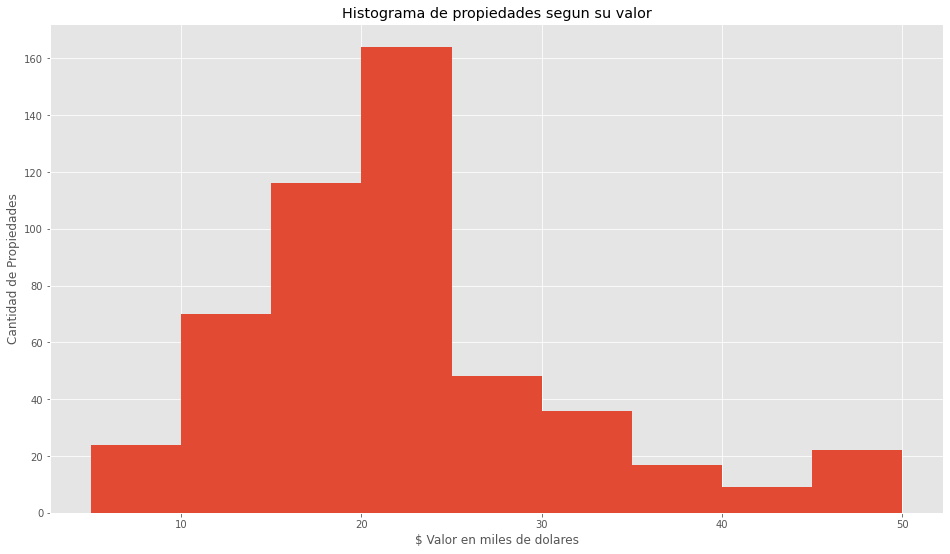

In [8]:
hist_viviendas=df['medv'].hist(bins=9)
hist_viviendas.set_ylabel("Cantidad de Propiedades")
hist_viviendas.set_xlabel("$ Valor en miles de dolares")
hist_viviendas.set_title('Histograma de propiedades segun su valor')

Text(0.5, 1.0, 'Diagrama de dispersion del valor de las propiedades segun la cantidad de habitaciones')

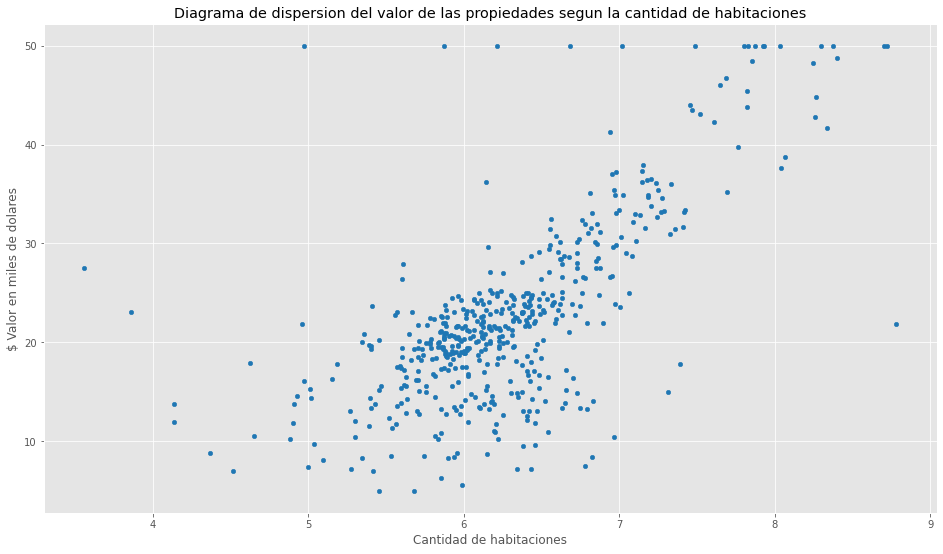

In [9]:
disp_habitaciones=df.plot(kind='scatter',x='rm', y='medv', c = ['#1f77b4'][0])
disp_habitaciones.set_ylabel('$ Valor en miles de dolares')
disp_habitaciones.set_xlabel('Cantidad de habitaciones')
disp_habitaciones.set_title('Diagrama de dispersion del valor de las propiedades segun la cantidad de habitaciones')

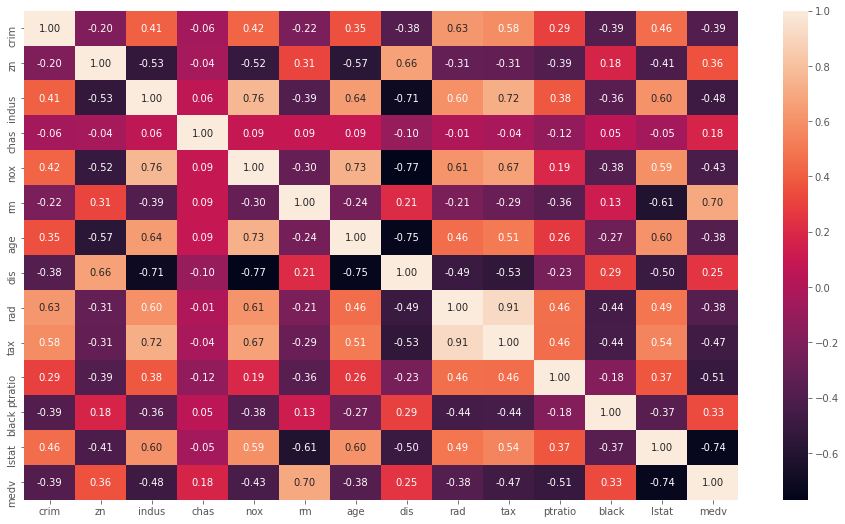

In [10]:
df_corr = df
correlacion = df_corr.corr()
sns.heatmap(correlacion, annot = True, fmt='.2f')
plt.show()

In [11]:
X = np.array(df.drop(['medv', 'chas', 'dis','black','zn' ],axis=1))
Y = np.array(df.medv.copy())

In [12]:
X.shape

(506, 9)

In [13]:
Y.shape

(506,)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(X)
df_min_max = scalerN.transform(X)

In [15]:
print(df_min_max)

[[0.00000000e+00 6.78152493e-02 3.14814815e-01 ... 2.08015267e-01
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 2.42302053e-01 1.72839506e-01 ... 1.04961832e-01
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 2.42302053e-01 1.72839506e-01 ... 1.04961832e-01
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 4.20454545e-01 3.86831276e-01 ... 1.64122137e-01
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 4.20454545e-01 3.86831276e-01 ... 1.64122137e-01
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 4.20454545e-01 3.86831276e-01 ... 1.64122137e-01
  8.93617021e-01 1.69701987e-01]]


In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_min_max,Y,test_size=0.2)

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=250, max_depth=8, criterion='mse')
rf = model.fit(Xtrain, Ytrain)

In [23]:
Yhat = model.predict(Xtest)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('Error cuadratico medio')
cuadrado_forest = mean_squared_error(Ytest, Yhat)
print(cuadrado_forest)

print('Error absoluto medio')
absoluto_forest= mean_absolute_error(Ytest, Yhat)
print(absoluto_forest)

print('Coeficiente de determinacion')
determinacion_forest = r2_score(Ytest, Yhat)
print(determinacion_forest)

print('Precision')
print(model.score(Xtrain, Ytrain))

Error cuadratico medio
13.021113879158692
Error absoluto medio
2.557912056570341
Coeficiente de determinacion
0.861593261291369
Precision
0.9664818329674875


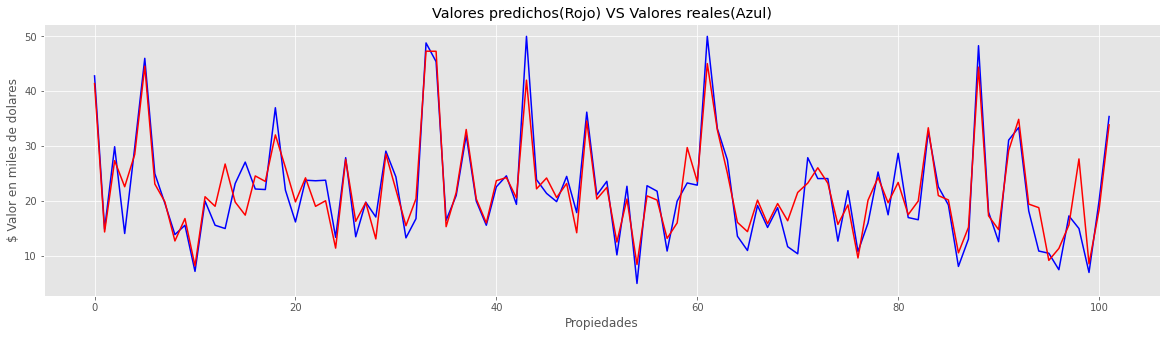

In [20]:
plt.subplots(figsize=(20,5))
plt.xlabel('Propiedades')
plt.ylabel('$ Valor en miles de dolares')
plt.title('Valores predichos(Rojo) VS Valores reales(Azul)')
plt.plot(Ytest, 'b')
plt.plot(Yhat, 'r')

In [25]:
import joblib
import json 

In [26]:
joblib.dump(rf, "./random_forest.joblib", compress=True)

['./random_forest.joblib']